In [1]:
import pandas as pd
import numpy as np
import datetime as datetime
import seaborn as sns
import os
import matplotlib.pyplot as plt
import datetime



#file names

calender_file_name = 'calendar.csv'
listings_file_name = 'listings.csv'
review_file_name = 'reviews.csv'

reviews = pd.read_csv(review_file_name)
listings = pd.read_csv(listings_file_name)
calendar = pd.read_csv(calender_file_name)

# Exploratory Data Analysis

In the below section, I will be probing the dataset to select the questions I will be considering
I will look through each table and see what kind of information I can gather



In [2]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [3]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,3.585000e+03,3.585000e+03,3.585000e+03,3585.000000,3585.000000,0.0,3585.000000,3585.000000,3585.000000,3571.000000,...,2762.000000,2767.000000,2765.000000,2767.000000,2763.000000,2764.000000,0.0,0.0,3585.000000,2829.000000
mean,8.440875e+06,2.016091e+13,2.492311e+07,58.902371,58.902371,NaN,42.340032,-71.084818,3.041283,1.221647,...,9.431571,9.258041,9.646293,9.646549,9.414043,9.168234,NaN,NaN,12.733891,1.970908
std,4.500787e+06,8.516813e-01,2.292781e+07,171.119663,171.119663,NaN,0.024403,0.031565,1.778929,0.501487,...,0.931863,1.168977,0.762753,0.735507,0.903436,1.011116,NaN,NaN,29.415076,2.120561
min,3.353000e+03,2.016091e+13,4.240000e+03,0.000000,0.000000,NaN,42.235942,-71.171789,1.000000,0.000000,...,2.000000,2.000000,2.000000,4.000000,2.000000,2.000000,NaN,NaN,1.000000,0.010000
25%,4.679319e+06,2.016091e+13,6.103425e+06,1.000000,1.000000,NaN,42.329995,-71.105083,2.000000,1.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,NaN,NaN,1.000000,0.480000
50%,8.577620e+06,2.016091e+13,1.928100e+07,2.000000,2.000000,NaN,42.345201,-71.078429,2.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,NaN,NaN,2.000000,1.170000
75%,1.278953e+07,2.016091e+13,3.622147e+07,7.000000,7.000000,NaN,42.354685,-71.062155,4.000000,1.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,6.000000,2.720000
max,1.493346e+07,2.016091e+13,9.385411e+07,749.000000,749.000000,NaN,42.389982,-71.000100,16.000000,6.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,NaN,136.000000,19.150000


In [4]:
calendar.head(20)


,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
5,12147973,2017-08-31,f,NaN
6,12147973,2017-08-30,f,NaN
7,12147973,2017-08-29,f,NaN
8,12147973,2017-08-28,f,NaN
9,12147973,2017-08-27,f,NaN


Calendar seems to show the listing name, availability, and the price for each day

In [5]:
calendar['listing_id'].value_counts().keys()

Int64Index([12898806, 14710769,  7018497,  3946215,   951473,  5718921,
             3278624, 13624476,  9626428, 12175961,
            ...
              973695,  6181230, 10434883,  5026613, 14340601, 13951039,
            13512551,  5270703,   901914,  3250739],
           dtype='int64', length=3585)

We have around 3600 listings in both Calendar and listings

In [6]:
reviews.head(20)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
5,1178162,5198929,2013-06-17,6663826,Arndt,A truely exeptional place to stay. The hosts a...
6,1178162,6702817,2013-08-21,8099222,Maurice,It was a really nice time in Boston - best pla...
7,1178162,6873023,2013-08-28,7671888,Elodie,"Islam is a very nice guy ! Attentive, funny, h..."
8,1178162,7646702,2013-09-28,8197342,Arkadiusz,"The place is really well furnished, pleasant a..."
9,1178162,8094418,2013-10-15,9040491,Matthew,Our stay at Islam's place was fantastic. We co...


In [7]:
reviews.describe()

,listing_id,id,reviewer_id
count,6.827500e+04,6.827500e+04,6.827500e+04
mean,4.759910e+06,5.246516e+07,2.802389e+07
std,3.788990e+06,2.790991e+07,2.234097e+07
min,3.353000e+03,1.021000e+03,1.430000e+02
25%,1.458081e+06,3.010420e+07,9.001346e+06
50%,4.080000e+06,5.223121e+07,2.305179e+07
75%,7.377034e+06,7.663248e+07,4.213454e+07
max,1.484378e+07,9.999045e+07,9.335034e+07


Listings has a large number of columns. Let's see if the ID here matches the calendar listing_id

In [8]:
calendar_ids = sorted(calendar['listing_id'].value_counts().keys().tolist())
review_ids = sorted(reviews['listing_id'].value_counts().keys().tolist())
listing_ids = sorted(listings['id'].value_counts().keys().tolist())

In [9]:
print(len(calendar_ids))
print(len(review_ids))
print(len(listing_ids))

3585
2829
3585


# Calendar & Listing have the same number of listings. While around 20% are lacking reviews 
We might be able to leverage the number of reviews a unit has (or lack thereof) to understand occupancy

In [10]:
reviews['comments'][0]

"My stay at islam's place was really cool! Good location, 5min away from subway, then 10min from downtown. The room was nice, all place was clean. Islam managed pretty well our arrival, even if it was last minute ;) i do recommand this place to any airbnb user :)"

In [11]:
listings['cancellation_policy'].value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [12]:
listings['city'].value_counts()


Boston                       3381
Roxbury Crossing               24
Somerville                     19
Brookline                      18
Jamaica Plain                  18
Cambridge                      16
Dorchester                     15
Charlestown                    15
Brighton                       15
Allston                        12
Roslindale                      6
West Roxbury                    5
ROXBURY CROSSING                4
East Boston                     3
Mattapan                        3
Jamaica Plain                   2
South Boston                    2
Hyde Park                       2
Jamaica Plain, Boston           2
ALLSTON                         2
Boston, Massachusetts, US       2
Jamaica Plain, MA               1
Jamaica Plain (Boston)          1
dorchester, boston              1
east Boston                     1
Boston (Charlestown)            1
Mission Hill, Boston            1
Brighton                        1
Milton                          1
Newton        

# Questions to look at 
#### 1) relationship between number/length of reviews and % of listed dates available
#### 2) % of vacancies by time of year (Best time to list)
#### 3) Price vs Rating
#### 4) Relationship between availability and price of rental
#### 5) Main factors influencing occupancy rate


# Feature Creation

### 1) Number of reviews
### 2) Average number of words per comment\n
### 3)Number of repeat visits
### 4) Description length
### 5) Cancellation policy

In [52]:

class area_study(object):
    '''class to manipulate listing data and output plots relating price reviews
    takes in a list for each type of housing in each neighborhood 
    Takes in a type of home (e.g full apartment) and a neighborhood (e.g Cambridge)
    Outputs a price vs availability for that combo (e.g full apartment in Cambridge)'''
    
    def __init__(self, area_type,listings,quantiles = [.25,.5,.75,.95],ax=None):
        self.area = area_type[0]
        self.type = area_type[1]
        self.quantiles = quantiles
        
        if ax == None:
            fig, ax = plt.subplots(1)
            self.ax = ax
        else:
            self.ax = ax

        self.category_names = ['Lowest','Middle','High','Ultra-high','Top-Tier']
        
    def get_data(self):
        self.df = listings[(listings['neighbourhood']==self.area) & (listings['room_type'] == self.type)]

    def get_price_ranges(self):
        self.df['average_price'].dropna(how = any, axis = 0,inplace = True)
        prices = self.df['average_price']
        self.quantile_values = [np.quantile(prices,i) for i in self.quantiles]
        #print(self.quantiles)
        #print(self.quantile_values)
    def price_category_mapping(self,entry,quantiles):
        reversed_quantiles = quantiles[::-1]
        for index, quantile in enumerate(reversed_quantiles):
            if entry > quantile:
                return index
                
    def prepare_price_categories(self):
        self.df['price_category'] = pd.Series(np.zeros(self.df.shape[0])).astype(int)
        self.df.loc[:,'price_category'] = self.df['average_price'].apply(lambda price: self.price_category_mapping(price,self.quantile_values))
        #print(self.df['price_category'].value_counts().keys())
        #print(self.df)
    def plot_category_vs_ratings(self):
        colors = ['y','c','g','b','r','m']
        price_categories = list(self.df['price_category'].value_counts().keys())
        cat_dict = {self.category_names[index]:str(price_categories[index]) for index in range(len(price_categories))}
        #print(cat_dict)
        #print(price_categories)
        self.ax.set_title('{} - {}'.format(self.type,self.area))
        self.df.plot.scatter(x = 'average_price',y = 'review_scores_rating', c = 'price_category',cmap = 'tab10_r',ax=self.ax,legend = False)#,ax = ax)
        self.ax.set_ylim([40,100])
        handles, labels = self.ax.get_legend_handles_labels()

    
    


def calculate_repeat_visits(listing_id,reviews_df = reviews, listing_id_column_in_reviews_df = 'listing_id'):
    ''' Calculate the number of repeat visits for each listing
    For 'listing_id' == 1178162, should return 1'''
    
    return reviews_df[reviews_df[listing_id_column_in_reviews_df] == listing_id]['reviewer_id'].count() - reviews_df[reviews_df[listing_id_column_in_reviews_df] == listing_id]['reviewer_id'].nunique()

def get_pct_available_from_calendar_for_an_id( _id,calendar = calendar):
    '''Get the % of listed dates from (calendar) for listing with id (_id)'''
    return 100*calendar[calendar['listing_id']==_id]['available'].mean()

def get_listing_average_price(listing_id,table):
    '''Get the average price from (table) for listing with id (listing_id)'''
    return table[table['listing_id'] == listing_id]['price'].mean()

def category_mapping(entry,quantiles,categories=None):
    '''aims to binarize continous variables based on different quantiles
    Provides category (larger number means larger quantile) if no categories are provided'''
    #sort in reverse
    quantiles = sorted(quantiles)
    reversed_quantiles = quantiles[::-1]
    
    if categories == None: 
        for index, quantile in enumerate(reversed_quantiles):
            #go thru the reverse sorted list (largest to smallest).
            #Once your entry is larger than the category cutoff:
            if entry > quantile:
                #if no category, return category number
                return int(len(quantiles) - index)
    else:
        reverse_categories = categories[::-1]


        for index, quantile in enumerate(reversed_quantiles):
            #go thru the reverse sorted list (largest to smallest).
            #Once your entry is larger than the category cutoff:
            if entry > quantile:
                #provide a category name
                return categories[index]

def dummy_column_creator(df,column_name,dummyna=True,drop_first = True):
    #create dummies for column_name, and remove column_name from final df
    #option to create dummy column for nans and option to drop original column
    temp = pd.get_dummies(df[column_name],drop_first = drop_first,dummy_na=dummyna,prefix=column_name)
    return pd.concat([temp,df.loc[:,df.columns!=column_name]])

In [14]:
# Creating the features
#1) number of reviews
#create df holding number of reviews, and merge it with the listing
review_count = reviews.groupby('listing_id')['comments'].count()


#2) Average number of words per comment
reviews['word_count'] = reviews['comments'].apply(lambda x: len(x.split(' ')) if type(x) == str else 0)
#review_word_count = reviews.groupby('listing_id')['word_count'].average()

#3) Repeat visits - gathered from number of repeated reviews


listings['number of repeat visits'] = listings['id'].apply(lambda x: calculate_repeat_visits(x))

#4) Description length in words

listings['Description_length'] = listings['description'].apply(lambda x: len(x.split(' ')) if type(x) == str else 0)

#5) Cancellation policy

cancellation_policy = pd.get_dummies(listings['cancellation_policy'],drop_first = False)
listings = pd.concat([listings.loc[:,listings.columns != 'cancellation_policy'],cancellation_policy],axis = 1)

#6) Superhost status

listings.loc[:,'host_is_superhost'] = listings['host_is_superhost'].apply(lambda x: 1 if x == 't' else 0)

#7) Numerically quantify if a listing is instant_bookable
listings['instant_bookable'].replace('f',0,inplace=True)
listings['instant_bookable'].replace('t',1,inplace=True)

In [15]:
#7) Numerically quantify if a listing is instant_bookable
listings['instant_bookable'].replace('f',0,inplace=True)
listings['instant_bookable'].replace('t',1,inplace=True)

In [16]:
weekday_dict = {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
calendar['day_of_week'] = calendar['date'].apply(lambda x: weekday_dict[datetime.date(year = int(x.split('-')[0]), month = int(x.split('-')[1]), day = int(x.split('-')[2])).isoweekday()])




# Questions to look at 
#### 1) relationship between number/length of reviews and % of listed dates available
#### 2) % of vacancies by time of year (Best time to list)
#### 3) Relationship between availability and price of rental

In [17]:
#### 1) relationship between number/length of reviews and % of listed dates available
#to gather this info, we need the % of dates available.
calendar.loc[:,'available'] = calendar['available'].apply(lambda x: 1 if x == 't' else 0)

listings['% available'] = listings['id'].apply(lambda x: get_pct_available_from_calendar_for_an_id( _id = x, calendar = calendar))

listings['% occupied'] = listings['% available'].apply(lambda x: 100 - x)

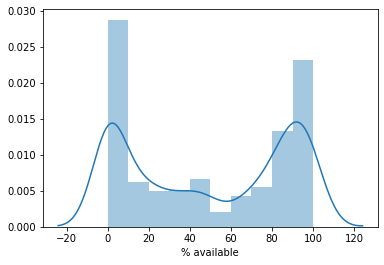

In [18]:
sns.distplot(listings['% available'])

In [19]:
numerical_listings = listings.loc[:,listings.dtypes != object]
#drop any column that is all NAs
numerical_listings.dropna(axis = 1, how = 'all',inplace = True)

<ipython-input-19-75f071cfc656>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_listings.dropna(axis = 1, how = 'all',inplace = True)


In [20]:
numerical_listings.columns
columns_to_investigate = [ 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'reviews_per_month', 'number of repeat visits', 'Description_length',
       'flexible', 'moderate', 'strict', 'super_strict_30','host_is_superhost', '% occupied']

# What are the biggest factors that influence how often a listing is available?

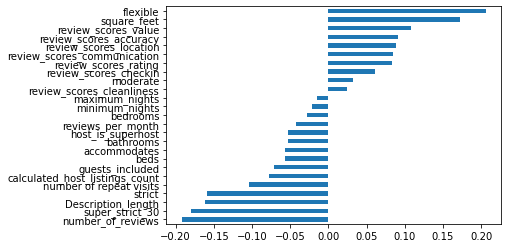

In [21]:
numerical_listings[columns_to_investigate].corr()['% occupied'].drop('% occupied').sort_values().plot(kind = 'barh')

This graph tells us that the number of reviews, having a strict cancellation policy, and a long description for your listing, are the off-putting to rentals! Leading to a higher rate of vacancy for a listing.
On the other hand, a flexible booking policy, a higher square foot-age (duh!) and a high review score for accuracy, seem to have the most positive effect on getting people to rent your property/

Features that didn't swing heavily either way were 
 1) Minimum nights
 2) Maximum nights
 3) Number of bedrooms
 4) Number of bathrooms.

# Question 2!
# What is the Best time to list?
By looking at the listing date, and the % of rentals that were vacant, in combination with the number of listed rentals, we can get a good idea of when there's a surge in rental activity in Boston!


In [22]:
calendar.head(10)

,listing_id,date,available,price,day_of_week
0,12147973,2017-09-05,0,NaN,Tuesday
1,12147973,2017-09-04,0,NaN,Monday
2,12147973,2017-09-03,0,NaN,Sunday
3,12147973,2017-09-02,0,NaN,Saturday
4,12147973,2017-09-01,0,NaN,Friday
5,12147973,2017-08-31,0,NaN,Thursday
6,12147973,2017-08-30,0,NaN,Wednesday
7,12147973,2017-08-29,0,NaN,Tuesday
8,12147973,2017-08-28,0,NaN,Monday
9,12147973,2017-08-27,0,NaN,Sunday


In [23]:
print('Start date of dataset is {}\n End date of dataset is {}'.format(calendar.date.min(),calendar.date.max()))

Start date of dataset is 2016-09-06
 End date of dataset is 2017-09-05


In [24]:
calendar['mm_dd'] = calendar['date'].apply(lambda x: str(x.split('-')[1])+'-' +str(x.split('-')[2]))

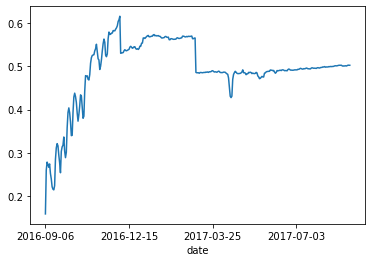

In [25]:
fig, ax = plt.subplots(1)
ax.locator_params(axis='x', nbins=6)
calendar.groupby(by = 'date')['available'].mean().plot(ax = ax)


# It seems like the winter isn't a great time to be leasing!
But the winter in Boston is so cold! Anyone could've told you that.
Let's look at the relationship between The rental prices and the calendar year

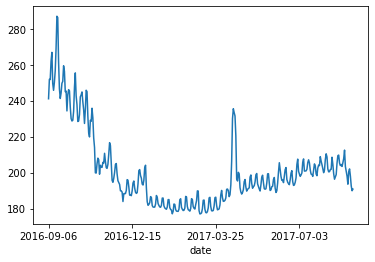

In [26]:
vacant = calendar[calendar['available']== 1].copy()
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: x.replace('$',''))
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: x.replace(',',''))
vacant.loc[:,'price'] = vacant['price'].apply(lambda x: int(x.split('.')[0]))



fig, ax = plt.subplots(1)
ax.locator_params(axis='x', nbins=6)
vacant.groupby(by = 'date')['price'].mean().plot(ax = ax)



In [27]:
vacant[vacant['available']== 1]['price'].max()

7163

It looks like there's one particular weekend where the availability drops, and the price skyrockets!
Let's see what weekend that is

In [28]:
availability_in_spike_range = calendar[(calendar['date']>'2017-03-25') & (calendar['date']<'2017-07-03')].groupby(by = 'date')['available'].mean()

Minimum availability is on 2017-04-16, where there was a massive price drop for 3 days


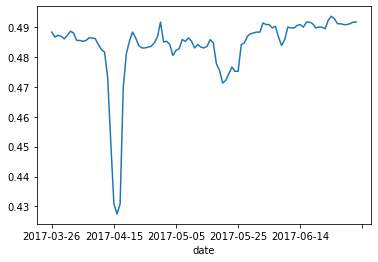

In [29]:
print('Minimum availability is on {}, where there was a massive price drop for 3 days'.format(availability_in_spike_range[availability_in_spike_range == availability_in_spike_range.min()].keys()[0]))
availability_in_spike_range.plot()#[availability_in_spike_range == availability_in_spike_range.min()]


It looks like the day of the boston marathon is a great day to have an airbnb in Boston!
Let's see what happens to prices in that time

date
2017-04-15    235.501618
Name: price, dtype: float64

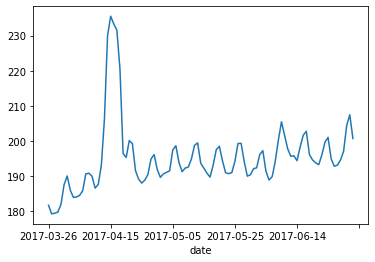

In [30]:
price_in_spike_range = vacant[(vacant['date']>'2017-03-25') & (vacant['date']<'2017-07-03')].groupby(by = 'date')['price'].mean()



price_in_spike_range.plot()
price_in_spike_range[price_in_spike_range == price_in_spike_range.max()]



## Large events seem to boost prices and reduce availability. What about days of week?
Are weekends more likely to net you a higher price?

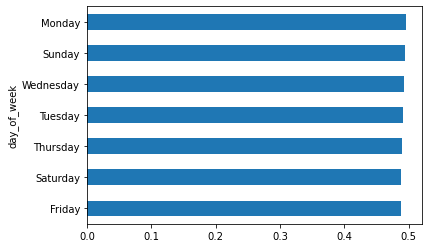

In [31]:
calendar.groupby('day_of_week')['available'].mean().sort_values().plot(kind = 'barh')

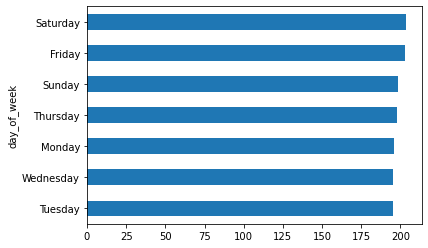

In [32]:
vacant.groupby('day_of_week')['price'].mean().sort_values().plot(kind = 'barh')

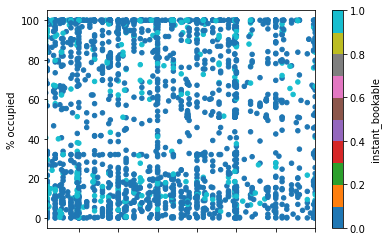

In [33]:
listings_2 = listings.copy()
listings_2['price'].dropna(inplace = True)
listings_2.loc[:,'price'] = listings_2['price'].apply(lambda x: x.replace('$',''))
listings_2.loc[:,'price'] = listings_2['price'].apply(lambda x: x.replace(',',''))
listings_2.loc[:,'price'] = listings_2['price'].apply(lambda x: int(x.split('.')[0]))
listings_2.plot(x='price',y='% occupied',c='instant_bookable',cmap = 'tab10',kind = 'scatter',xlim = [80,250])

# Question 3:
What is the relationship between Price & Rating?



In [34]:
listings['average_price'] = listings['id'].apply(lambda x: get_listing_average_price(x,vacant))

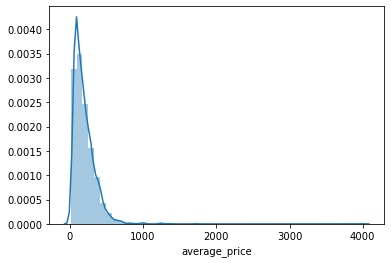

In [35]:
#this is the distribution of prices
sns.distplot(listings['average_price'])

# Let's take a look at the overall trend

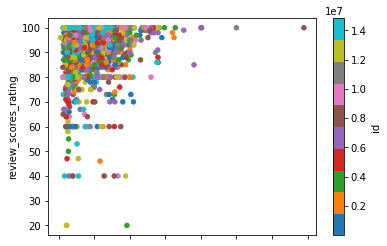

In [36]:
listings.plot(kind = 'scatter',x = 'average_price',y = 'review_scores_rating',c = 'id',cmap = 'tab10' )

From this rough overview, we can see that while the vast majority of cheaper listings are high in satisfaction, the overall quality does increase when entering the top 1% of listings

In [37]:
# to keep certain factors constant, let's look at the largest category of listings
print(list(listings.columns))
listings.groupby(by = ['room_type','neighbourhood'])['id'].count().sort_values(ascending = False)

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

room_type        neighbourhood    
Entire home/apt  Back Bay             251
                 South End            231
Private room     Allston-Brighton     209
Entire home/apt  Fenway/Kenmore       187
Private room     Jamaica Plain        167
                                     ... 
Shared room      Mattapan               1
                 Hyde Park              1
                 Downtown Crossing      1
Entire home/apt  Mattapan               1
Shared room      West End               1
Name: id, Length: 76, dtype: int64

In [38]:
listings_to_study = listings.groupby(by = ['room_type','neighbourhood'])['id'].count().sort_values(ascending = False).reset_index()[:10]

/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:4494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)
<ipython-input-13-226d3b4549c2>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['price_category'] = pd.Series(np.zeros(self.df.shape[0])).astype(int)
/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

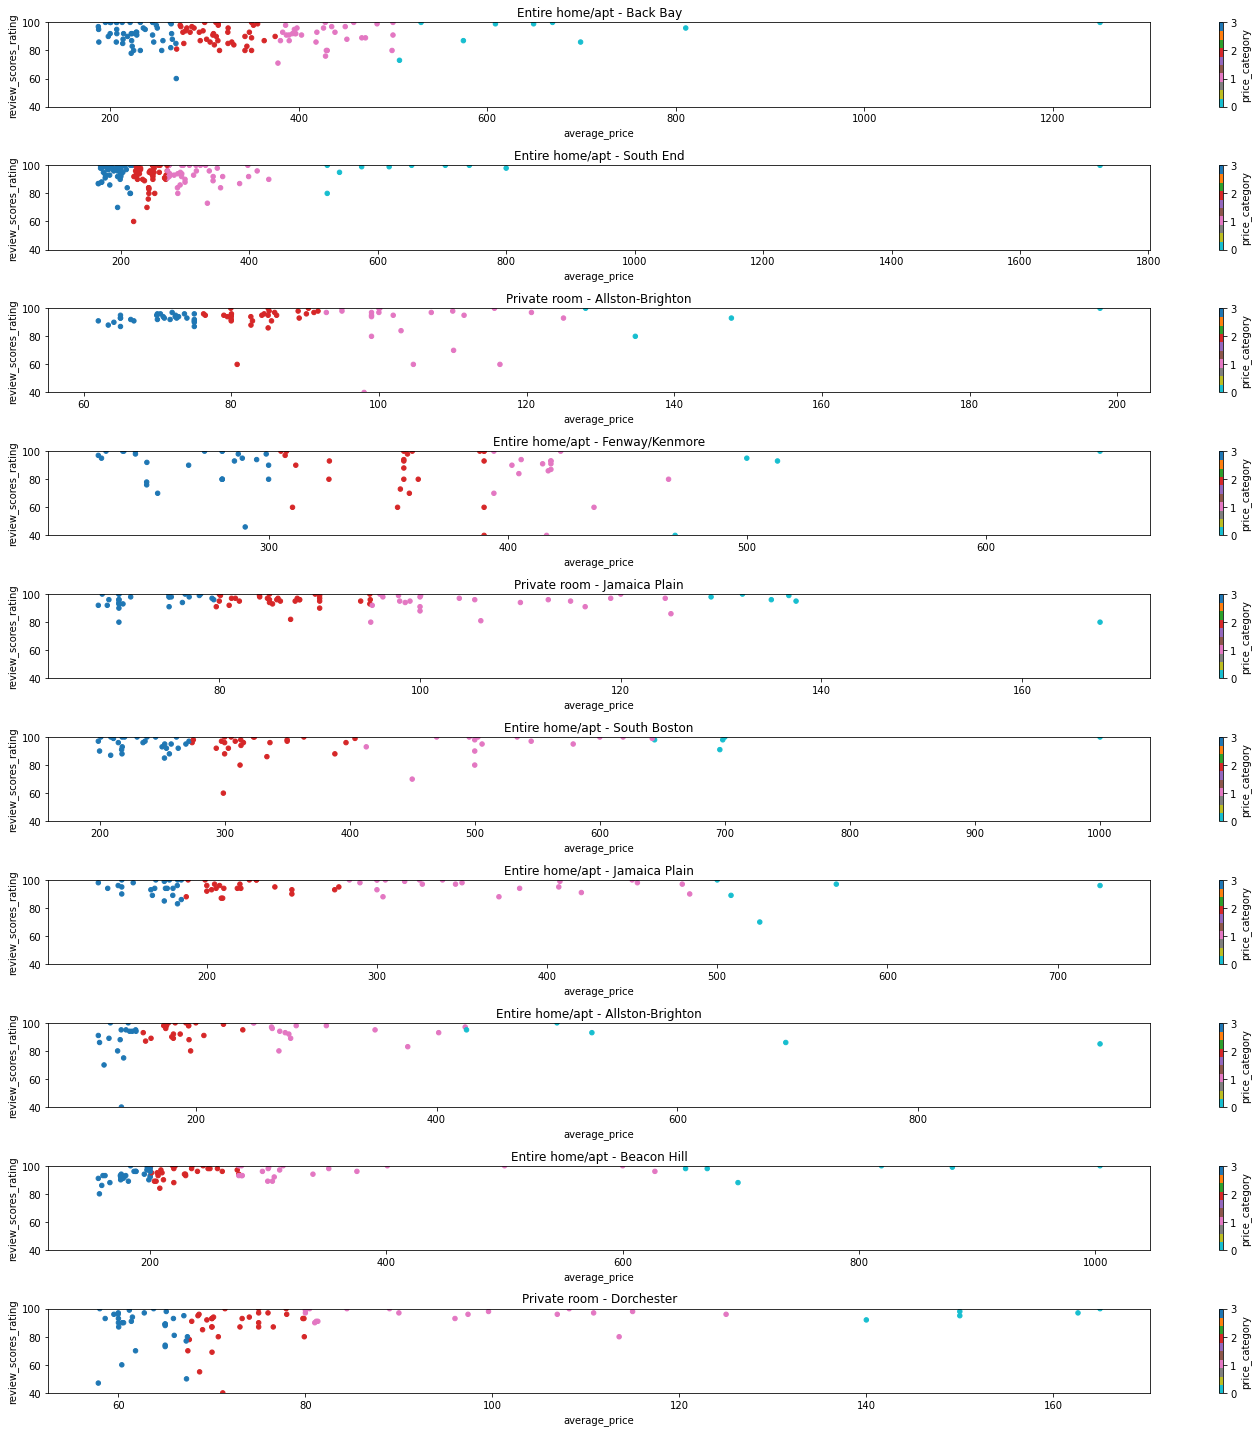

In [39]:
fig, ax = plt.subplots(10,figsize = (20,20),tight_layout = True)
#fig.subplots_adjust()
for index, row in enumerate(listings_to_study.iterrows()):

    area_to_study = row[1]['neighbourhood']
    room_type = row[1]['room_type']
    study = area_study([area_to_study,room_type],listings,ax = ax[index])
    study.get_data()
    study.get_price_ranges()
    study.prepare_price_categories()
    study.plot_category_vs_ratings()


# Most reviews seem to be positive, and while there are a few cases where you get what you pay for, the graphs don't represent the facts of the matter, let's look at the numerical breakdown here
We'll be seperating the prices into quartiles, and looking at the average review for each.

In [40]:
quantiles = [.25,.5,.75,.95]
print(quantiles)
            
temp_listings = listings[~listings['average_price'].isna()]
quantiles = [.25,.5,.75,.95]
prices = temp_listings['average_price'].values
quantile_values = [np.quantile(prices,i) for i in quantiles]
quantile_values.insert(0,0)
categories = ['Lowest Price','Budget','Average','Expensive','Most expensive']


temp_listings.loc[:,'price_category'] = temp_listings['average_price'].apply(lambda price: category_mapping(price,quantile_values,categories = categories))





[0.25, 0.5, 0.75, 0.95]


/Users/omargurashi/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [41]:
listing_price_rating_breakdown = temp_listings.groupby(['neighbourhood','room_type','price_category'])['review_scores_rating'].mean().reset_index()

In [42]:
temp_listings['price_category'].value_counts()

Most expensive    735
Expensive         731
Average           713
Budget            581
Lowest Price      146
Name: price_category, dtype: int64

In [43]:
listing_price_rating_breakdown.head(200)

,neighbourhood,room_type,price_category,review_scores_rating
0,Allston-Brighton,Entire home/apt,Average,95.043478
1,Allston-Brighton,Entire home/apt,Budget,92.250000
2,Allston-Brighton,Entire home/apt,Expensive,88.966667
3,Allston-Brighton,Entire home/apt,Lowest Price,91.000000
4,Allston-Brighton,Entire home/apt,Most expensive,91.500000
...,...,...,...,...
185,West Roxbury,Entire home/apt,Average,95.000000
186,West Roxbury,Entire home/apt,Budget,100.000000
187,West Roxbury,Entire home/apt,Expensive,97.500000
188,West Roxbury,Private room,Expensive,100.000000


# It seems like the bottom quartile of prices (<90 dollars) typically get worse reviews, the trend breaks down in other cases.
In conclusion, the higher 

# With ~74% of listings getting a score of above 90%, we realize that there is a skew when it comes to reviews. We will break down the review scores into categories, and see whether the price correlates with the reviews

Draw a heatmap for price and review category for each neighborhood/room_type
Maybe look at how room type influences review category as well

In [55]:
boxes = [np.quantile(listings['review_scores_rating'].dropna(),i) for i in [.26,.35,.46,.56,.66,.76,.86]]
listings['review_scores_rating_category'] = listings['review_scores_rating'].apply(lambda entry: category_mapping(entry,boxes))

In [56]:
print(boxes)
listings['review_scores_rating_category'].value_counts()

[90.0, 91.0, 93.0, 95.0, 97.0, 99.0, 100.0]


6.0    628
4.0    365
2.0    310
3.0    280
5.0    218
1.0     88
Name: review_scores_rating_category, dtype: int64

In [47]:
#category_mapping(entry,quantiles,categories=None)
#dummy_column_creator(df,column_name,dummyna=True,drop_first = True):


In [53]:
listings.loc[:,'price_category'] = listings['average_price'].apply(lambda price: category_mapping(price,quantile_values))
#listings = dummy_column_creator(listings,'review_scores_rating_category')
listings = dummy_column_creator(listings,'price_category')
listings = dummy_column_creator(listings,'room_type')
listings = dummy_column_creator(listings,'neighbourhood')




In [54]:
list(listings.columns)

['neighbourhood_Back Bay',
 'neighbourhood_Beacon Hill',
 'neighbourhood_Brookline',
 'neighbourhood_Cambridge',
 'neighbourhood_Charlestown',
 'neighbourhood_Chestnut Hill',
 'neighbourhood_Chinatown',
 'neighbourhood_Dorchester',
 'neighbourhood_Downtown',
 'neighbourhood_Downtown Crossing',
 'neighbourhood_East Boston',
 'neighbourhood_Fenway/Kenmore',
 'neighbourhood_Financial District',
 'neighbourhood_Government Center',
 'neighbourhood_Harvard Square',
 'neighbourhood_Hyde Park',
 'neighbourhood_Jamaica Plain',
 'neighbourhood_Leather District',
 'neighbourhood_Mattapan',
 'neighbourhood_Mission Hill',
 'neighbourhood_North End',
 'neighbourhood_Roslindale',
 'neighbourhood_Roxbury',
 'neighbourhood_Somerville',
 'neighbourhood_South Boston',
 'neighbourhood_South End',
 'neighbourhood_Theater District',
 'neighbourhood_West End',
 'neighbourhood_West Roxbury',
 'neighbourhood_nan',
 'room_type_Private room',
 'room_type_Shared room',
 'room_type_nan',
 'price_category_2.0',
 'p

In [ ]:
columns_to_study = [ 'price_category_1.0',
 'price_category_2.0',
 'price_category_3.0',
 'price_category_4.0',
 'price_category_nan',
 'review_scores_rating']

In [ ]:
#based on https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
myBasicCorr = listings[columns_to_study].corr()

#mask = np.zeros(myBasicCorr.shape, dtype=bool)
#mask[np.triu_indices(len(mask))] = True
sns.heatmap(myBasicCorr,vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = True)#, mask = mask)


In [ ]:
columns_to_study = [
     'room_type_Private room',
 'room_type_Shared room',
 'room_type_nan',
 'price_category_Budget',
 'price_category_Expensive',
 'price_category_Lowest Price',
 'price_category_Most expensive',
 'price_category_nan',
 'review_scores_rating_category_average',
 'review_scores_rating_category_good',
 'review_scores_rating_category_poor',
 'review_scores_rating_category_very poor',
 'review_scores_rating_category_worst rated',
 'review_scores_rating_category_nan']

#based on https://towardsdatascience.com/formatting-tips-for-correlation-heatmaps-in-seaborn-4478ef15d87f
myBasicCorr = listings[columns_to_study].corr()

#mask = np.zeros(myBasicCorr.shape, dtype=bool)
#mask[np.triu_indices(len(mask))] = True
sns.heatmap(myBasicCorr,vmin = -1, vmax = 1, center = 0, cmap = 'coolwarm', annot = False)#, mask = mask)

